# CNN for image classification

## Dataset = CIFAR-10

In this dataset we have 10 possible classes which are arranges according to their label

0.  Airplane 
1.  Automobile
2.  Bird 
3.  cat
4.  Deer
5.  Dog
6.  Frog
7.  Horse
8.  Ship 
9.  Truck

In [ ]:
from keras.datasets import cifar10

In [ ]:
dataset = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
(X_train, Y_train),(X_test, Y_test) = dataset
# Splits the dataset in training and testing

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical as OneHot 
Y_train_one_hot = OneHot(Y_train,10)
Y_test_one_hot = OneHot(Y_test,10)

In [ ]:
 X_train = X_train.astype('float32')
 X_test = X_test.astype('float32')
 X_train = X_train/255
 X_test = X_test/255

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
## Importing all the layers to build the CNN

In [ ]:
model1 = Sequential() 

In [ ]:
# # # Model 1

model1.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
# first layer of the neural network. 
model1.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
# second layer of the neural network in this we dont need to specify input shape as it will take input form the previous layer
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model1.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(512, activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation = 'softmax'))
model1.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
hist = model1.fit(X_train, Y_train_one_hot, batch_size = 32, epochs = 25 , validation_split = 0.2, verbose = 1)
print("Model 1 with validation data for 100 epochs running")
model1.save('model1.h5')
print("model training complete and saved successfully !")

In [ ]:
# Model 2
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
## Importing all the layers to build the CNN

model2 = Sequential() 
# first layer of the neural network. 
model2.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
# second layer of the neural network in this we dont need to specify input shape as it will  take input form the previous layer
model2.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same')) 
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model2.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model2.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation = 'softmax'))
model2.compile(loss='categorical_crossentropy', optimizer = "sgd", metrics=['accuracy'])

# data Augmentation
from keras.preprocessing.image import ImageDataGenerator

#ImageDataGenerator from keras is used to modify image
datagenerator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range = 0.1,
    horizontal_flip=True,
    )

# new training set is created with modified images
new_train_set = datagenerator.flow(X_train, Y_train_one_hot, batch_size=32)

# no.of steps that apply per epoch 
steps  = int(X_train.shape[0]/32)

# new model2 is created with augmented data and fitting it directly on the dataset.
augmented_model2 = model2.fit_generator(new_train_set, steps_per_epoch= steps , epochs=50, 
                                      validation_data=(X_test, Y_test_one_hot), verbose = 1)

model2.save('model2.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
1562/1562 [==============================] - 64s 33ms/step - loss: 2.1443 - accuracy: 0.2004 - val_loss: 1.9901 - val_accuracy: 0.2788
Epoch 2/50
1562/1562 [==============================] - 51s 33ms/step - loss: 1.9250 - accuracy: 0.2989 - val_loss: 1.7287 - val_accuracy: 0.3804
Epoch 3/50
1562/1562 [==============================] - 51s 33ms/step - loss: 1.7367 - accuracy: 0.3600 - val_loss: 1.5861 - val_accuracy: 0.4164
Epoch 4/50
1562/1562 [==============================] - 52s 33ms/step - loss: 1.6072 - accuracy: 0.4099 - val_loss: 1.4087 - val_accuracy: 0.4846
Epoch 5/50
1562/1562 [==============================] - 51s 33ms/step - loss: 1.5144 - accuracy: 0.4489 - val_loss: 1.3383 - val_accuracy: 0.5137
Epoch 6/50
1562/1562 [==============================] - 51s 33ms/step - loss: 1.4327 - accuracy: 0.4821 - val_loss: 1.2763 - val_accuracy: 0.5372
Epoch 7/50
1562/1562 [==============================] - 51s 33ms/step - loss: 1.3585 - accuracy: 0.5106 - val_loss: 1.2074 -

In [ ]:

# Model 3

model3 = Sequential()
# first layer of the neural network. 
model3.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model3.add(BatchNormalization())
# second layer of the neural network in this we dont need to specify input shape as it will take input form the previous layer
model3.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same')) 
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation = 'softmax'))
model3.compile(loss='categorical_crossentropy', optimizer = "sgd", metrics=['accuracy'])

# data Augmentation
from keras.preprocessing.image import ImageDataGenerator

#ImageDataGenerator is used to modify image
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range = 0.1,
    horizontal_flip=True,
    )

# new training set is created with modified images
new_train_set = datagen.flow(X_train, Y_train_one_hot, batch_size=32)

# no.of steps that apply per epoch 
steps  = int(X_train.shape[0]/32)


# new model is created with augmented data
augmented_model = model3.fit_generator(new_train_set, steps_per_epoch= steps , epochs=50, 
                                      validation_data=(X_test, Y_test_one_hot), verbose = 1)


In [ ]:
# compile model
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model3.compile(loss='categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])

In [ ]:
hist = model3.fit(X_train, Y_train_one_hot, batch_size = 32, epochs = 25 , validation_split=0.2, verbose = 1)
print("Model 2 with validation data for 100 epochs running")
# with validation split we do not need to split our dataset into training set and validation set in the begining
# In this case 20% of the datset will be used as the validation set

hist = model3.fit(X_train, Y_train_one_hot, batch_size = 32, epochs = 25 , 
                 validation_data = (X_test,Y_test_one_hot), verbose = 1)

In [ ]:
X_test.shape

In [ ]:
acc = model3.evaluate(X_test, Y_test_one_hot)

313/313 [==============================] - 3s 9ms/step - loss: 0.4597 - accuracy: 0.8501


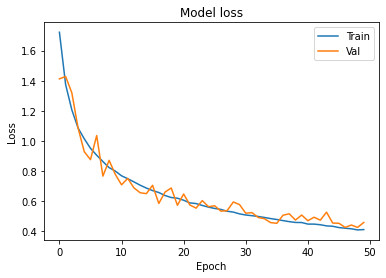

In [ ]:
import matplotlib.pyplot as plt

plt.plot(augmented_model.history['loss'])
plt.plot(augmented_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

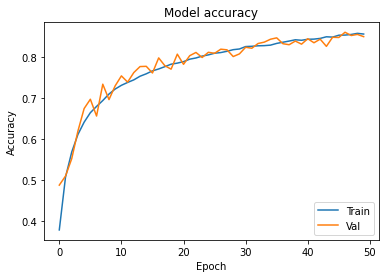

In [ ]:
plt.plot(augmented_model.history['accuracy'])
plt.plot(augmented_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [ ]:
my_img = plt.imread("cat-frog.jpg")

In [ ]:
from skimage.transform import resize
my_img_resized = resize(my_img,(32,32,3))

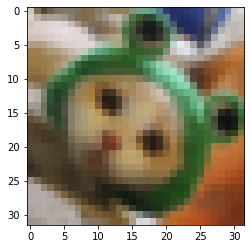

In [ ]:
img = plt.imshow(my_img_resized)

In [ ]:
import numpy as np 
probabilities = model.predict(np.array([my_img_resized,]))

In [ ]:
probabilities

array([[1.2858708e-05, 1.3957443e-04, 1.2045423e-02, 2.2246581e-02,
        4.1112150e-03, 9.5946050e-01, 7.7225978e-04, 1.1991545e-03,
        4.1149195e-07, 1.2072728e-05]], dtype=float32)

In [ ]:
number_to_class = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Possibility:", probabilities[0,index[9]]*100, "%")
print("Second most likely class:", number_to_class[index[8]], "-- Possibility:", probabilities[0,index[8]]*100, "%")
print("Third most likely class:", number_to_class[index[7]], "-- Possibility:", probabilities[0,index[7]]*100, "%")
print("Fourth most likely class:", number_to_class[index[6]], "-- Possibility:", probabilities[0,index[6]]*100, "%")
print("Fifth most likely class:", number_to_class[index[5]], "-- Possibility:", probabilities[0,index[5]]*100, "%")

Most likely class: dog -- Possibility: 95.94604969024658 %
Second most likely class: cat -- Possibility: 2.2246580570936203 %
Third most likely class: bird -- Possibility: 1.2045422568917274 %
Fourth most likely class: deer -- Possibility: 0.4111215006560087 %
Fifth most likely class: horse -- Possibility: 0.11991545325145125 %
